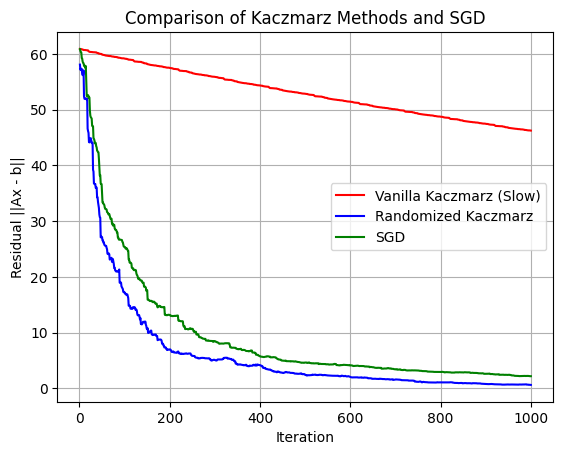

In [114]:
import numpy as np
import matplotlib.pyplot as plt

# Problem setup
m = 100
n = 50
iterations = 1000
A =np.random.randn(m, n)
x_true = np.random.randn(n)
b = A @ x_true
x0 = np.zeros(n)

# Vanilla Kaczmarz with slower convergence (small step size)
x_vanilla = x0.copy()
error_vanilla = np.zeros(iterations)
step_size_vanilla = 0.01
for k in range(iterations):
    i = k % m  # Sequential row choice (cyclic)
    ai = A[i, :]
    bi = b[i]
    
    x_vanilla += step_size_vanilla * (bi - ai @ x_vanilla) / (np.linalg.norm(ai)**2) * ai
    
    error_vanilla[k] = np.linalg.norm(A @ x_vanilla - b)

# Randomized Kaczmarz
x_random = x0.copy()
error_random = np.zeros(iterations)
row_norms = np.sum(A**2, axis=1)
row_probs = row_norms / np.sum(row_norms)
for k in range(iterations):
    i = np.random.choice(m, p=row_probs)
    ai = A[i, :]
    bi = b[i]
    x_random += (bi - ai @ x_random) / (np.linalg.norm(ai)**2) * ai
    error_random[k] = np.linalg.norm(A @ x_random - b)

x_sgd = x0.copy()
error_sgd = np.zeros(iterations)
learning_rate_sgd = 0.01
for k in range(iterations):
    i = np.random.choice(m)
    ai = A[i, :]
    bi = b[i]
    gradient = (ai @ x_sgd - bi) * ai
    x_sgd -= learning_rate_sgd * gradient
    error_sgd[k] = np.linalg.norm(A @ x_sgd - b)

plt.figure()
plt.plot(range(1, iterations + 1), error_vanilla, 'r', linewidth=1.5, label='Vanilla Kaczmarz (Slow)')
plt.plot(range(1, iterations + 1), error_random, 'b', linewidth=1.5, label='Randomized Kaczmarz')
plt.plot(range(1, iterations + 1), error_sgd, 'g', linewidth=1.5, label='SGD')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Residual ||Ax - b||')
plt.title('Comparison of Kaczmarz Methods and SGD')
plt.grid()
plt.show()
